# Ejercicio Formativo 1 Capítulo 3

## Importando librerías

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Creando DataFrame

In [2]:
df = pd.read_csv('data_E1.csv')
display(df.head())

,Unnamed: 0,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm    36
body_mass_g           2
sex                  10
dtype: int64

## Misión 1: Completando información

Se nos solicita completar la información númerica faltante haciendo uso de la media de cada columna.

In [6]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [7]:
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].mean())

In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

Se nos solicita descartar los registros para los cuales hay variables categóricas con valores faltantes

In [9]:
df = df.dropna()

In [10]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Misión 2: Preparación de los datos

### Codificación numérica de variables categóricas.

In [11]:
categorical_columns = ['species', 'island', 'sex']
encoder_dict = {}

In [12]:
from sklearn.preprocessing import LabelEncoder

for column in categorical_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoder_dict[column] = label_encoder
df.dtypes

species                int32
island                 int32
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int32
dtype: object

### Separación en conjuntos de entrenamiento y test.

In [13]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(df.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(training_set)}')
print(f'Tamaño set test: {len(test_set)}')

Tamaño set entrenamiento: 233
Tamaño set test: 101


### Escalamiento de variables numéricas.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

training_set[numerical_columns] = scaler.fit_transform(training_set[numerical_columns])
test_set[numerical_columns] = scaler.transform(test_set[numerical_columns])

training_set.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
219,1,1,1.244525,0.738217,-0.187103,-0.504533,1
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2
244,2,0,-0.147382,-2.103155,1.107420,1.077520,1
202,1,1,0.844114,-0.428775,-0.110954,-1.085696,1


## Misión 3: Análisis exploratorio visual

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [16]:
warnings.filterwarnings('ignore', category=FutureWarning)

colors = ['navy', 'turquoise', 'darkorange']
target_names = encoder_dict['species'].inverse_transform([0, 1, 2])

features = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

In [17]:
print(target_names)

['Adelie' 'Chinstrap' 'Gentoo']


In [18]:
X_PCA = PCA(n_components=2).fit_transform(training_set[features])
X_TSNE = TSNE(n_components=2).fit_transform(training_set[features])

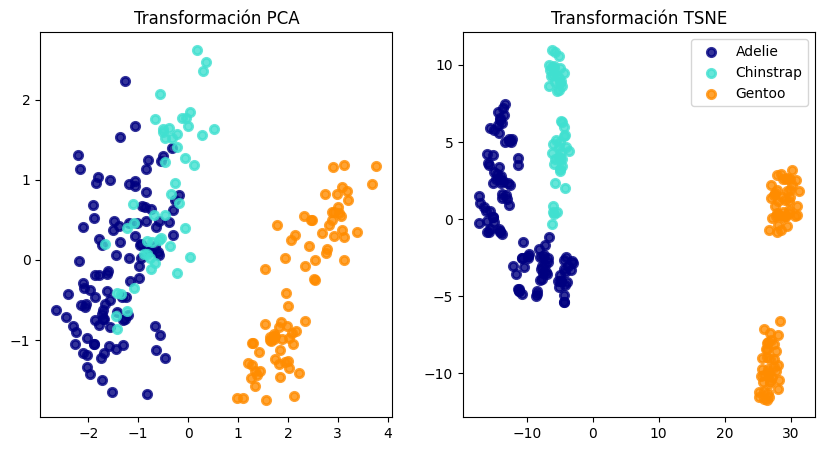

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_PCA[training_set['species'] == i, 0], X_PCA[training_set['species'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
#plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('Transformación PCA')

plt.subplot(1,2,2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_TSNE[training_set['species'] == i, 0], X_TSNE[training_set['species'] == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
plt.title('Transformación TSNE')

plt.legend(loc="best", shadow=False, scatterpoints=1);

## Misión 4: Análisis de clusters

### Análisis con datos sin reducir

#### Número óptimo de clusters

In [20]:
from sklearn.cluster import KMeans

In [21]:
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(training_set[features])
    cluster_var.append(kmeans.inertia_)

In [22]:
from matplotlib.ticker import MaxNLocator

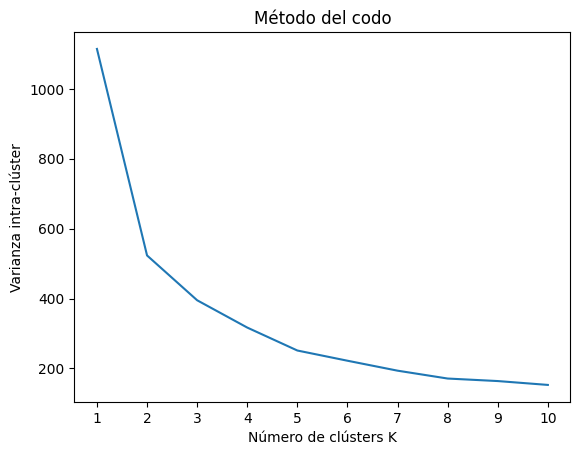

In [23]:
ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [24]:
training_set_copy = training_set.copy()

In [25]:
features = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

In [26]:
kmeans = KMeans(n_clusters=5)

kmeans_labels = kmeans.fit_predict(training_set_copy[features])

training_set_copy['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

In [27]:
display(training_set_copy.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
219,1,1,1.244525,0.738217,-0.187103,-0.504533,1,1
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1,3
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2,4
244,2,0,-0.147382,-2.103155,1.107420,1.077520,1,0
202,1,1,0.844114,-0.428775,-0.110954,-1.085696,1,1


#### Análisis visual

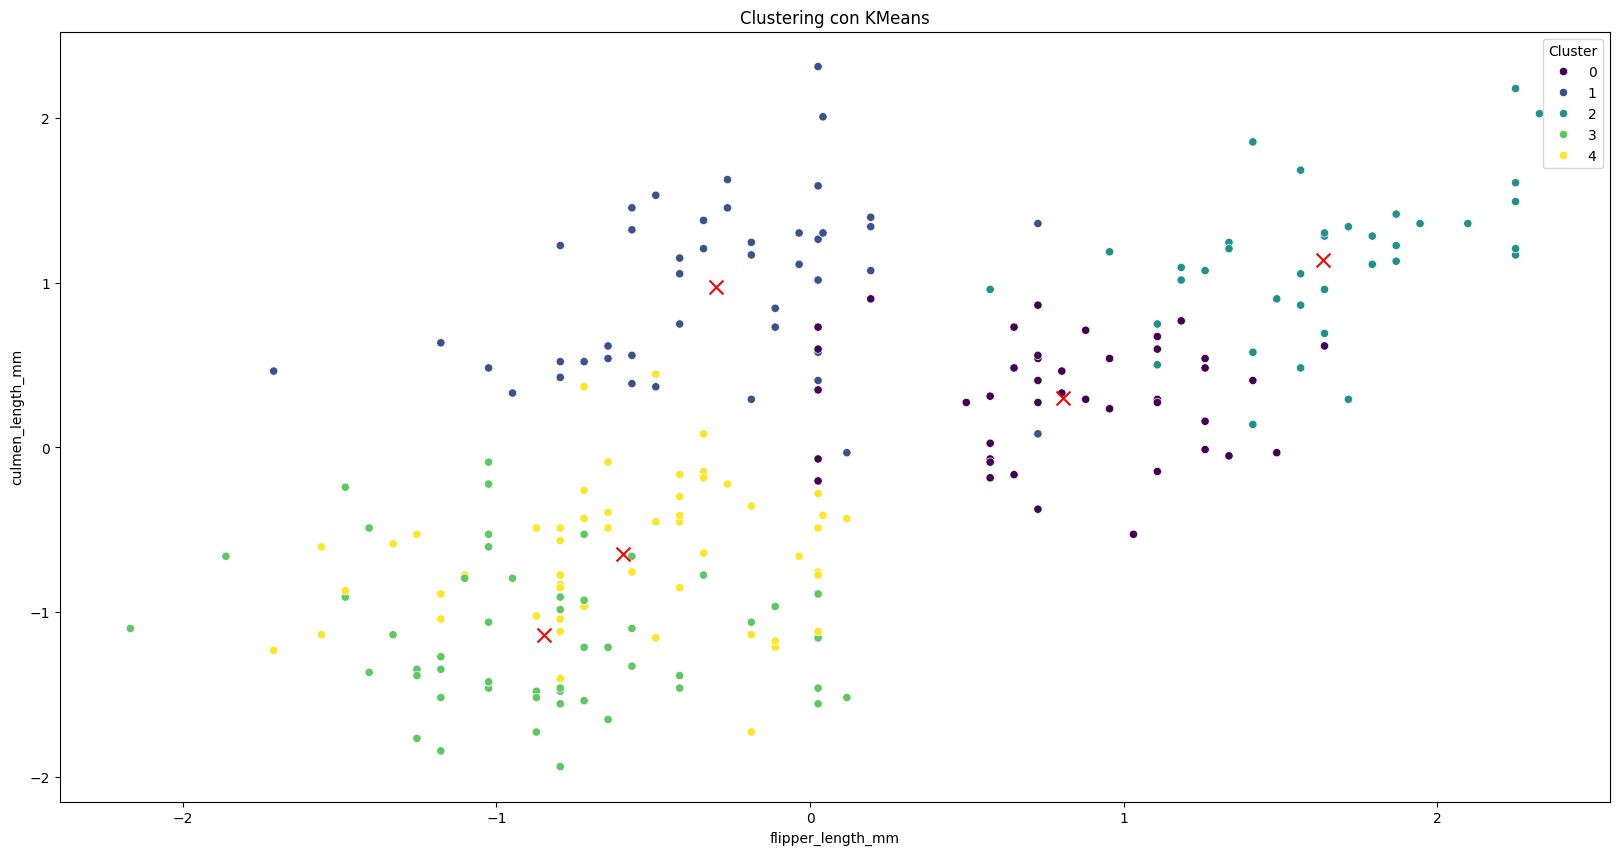

In [28]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='Cluster', data=training_set_copy, palette='viridis', legend='full')
plt.scatter(centroids[:, features.index('flipper_length_mm')], centroids[:, features.index('culmen_length_mm')], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')
        
plt.show()

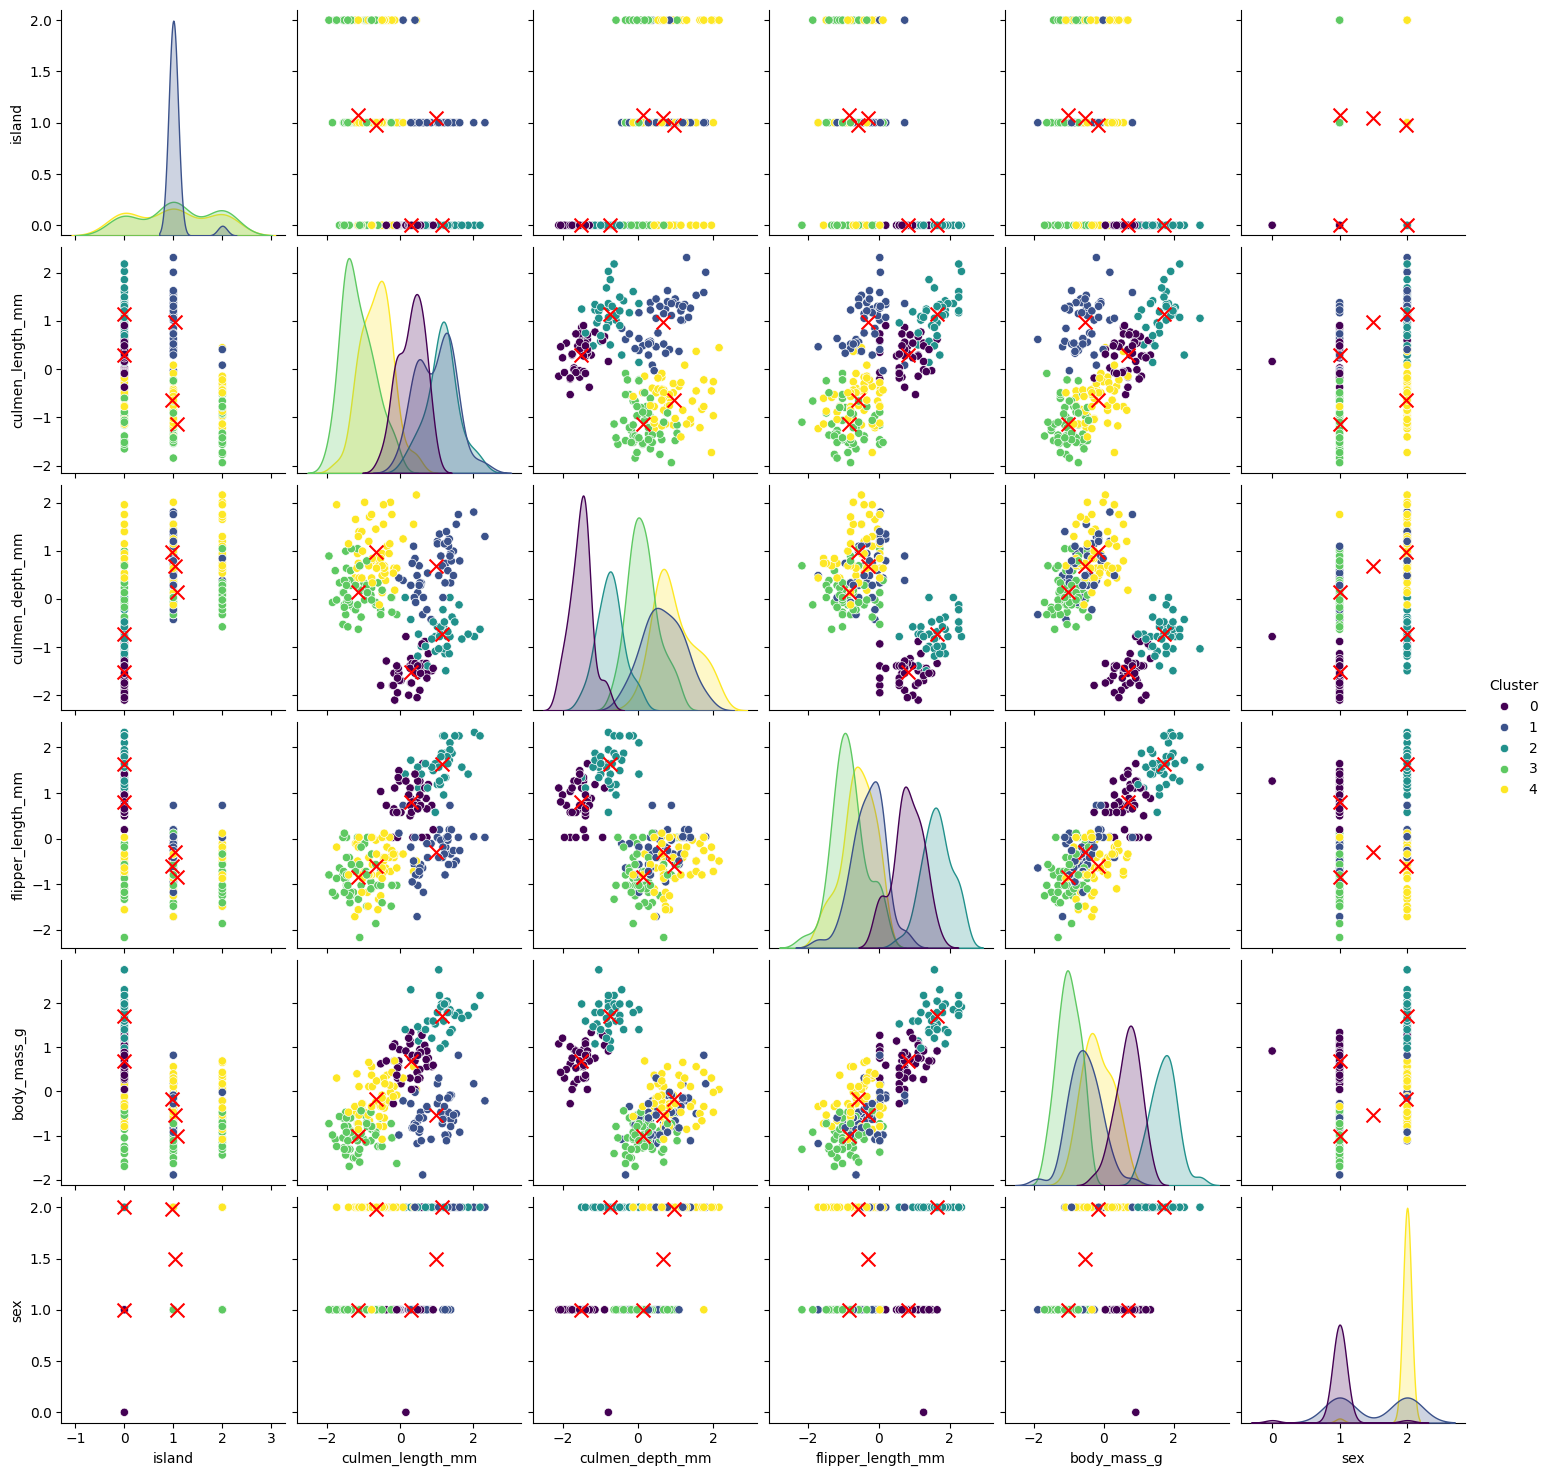

In [29]:
pairplot = sns.pairplot(training_set_copy, vars=features, hue='Cluster', palette='viridis')

for ax in pairplot.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel in features and ylabel in features:
        ax.scatter(centroids[:, features.index(xlabel)], centroids[:, features.index(ylabel)], c='red', s=100, marker='x')
        
plt.show()

In [30]:
print(list(zip([0, 1, 2], target_names)))

[(0, 'Adelie'), (1, 'Chinstrap'), (2, 'Gentoo')]


In [31]:
cluster_stats = training_set_copy.groupby('Cluster')['species'].value_counts(normalize=True)

print(cluster_stats)

Cluster  species
0        2          1.000000
1        1          0.956522
         0          0.043478
2        2          1.000000
3        0          0.910714
         1          0.089286
4        0          1.000000
Name: proportion, dtype: float64


Para los datos completos se reviso los clusters y sus centroides, respecto a cada una de sus variables.

### Análisis con datos reducidos con PCA

#### Número óptimo de clusters

In [32]:
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_PCA)
    cluster_var.append(kmeans.inertia_)

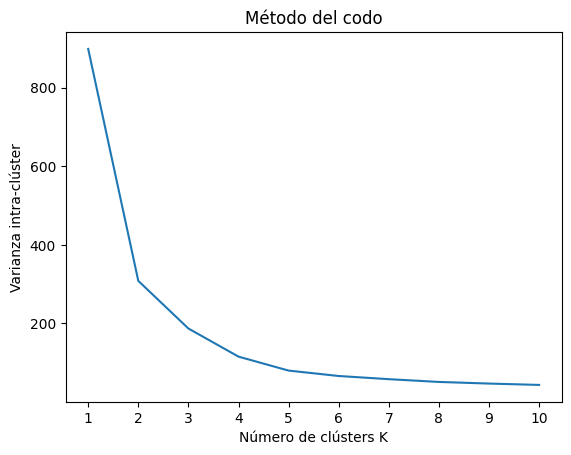

In [33]:
ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#### Análisis visual

In [34]:
training_set_copy = training_set.copy()

In [35]:
kmeans = KMeans(n_clusters=5)

kmeans_labels = kmeans.fit_predict(X_PCA)

df_X_PCA = pd.DataFrame(X_PCA, columns=['Componente 1', 'Componente 2'])

df_X_PCA['species'] = training_set['species']

df_X_PCA['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Clustering con KMeans')

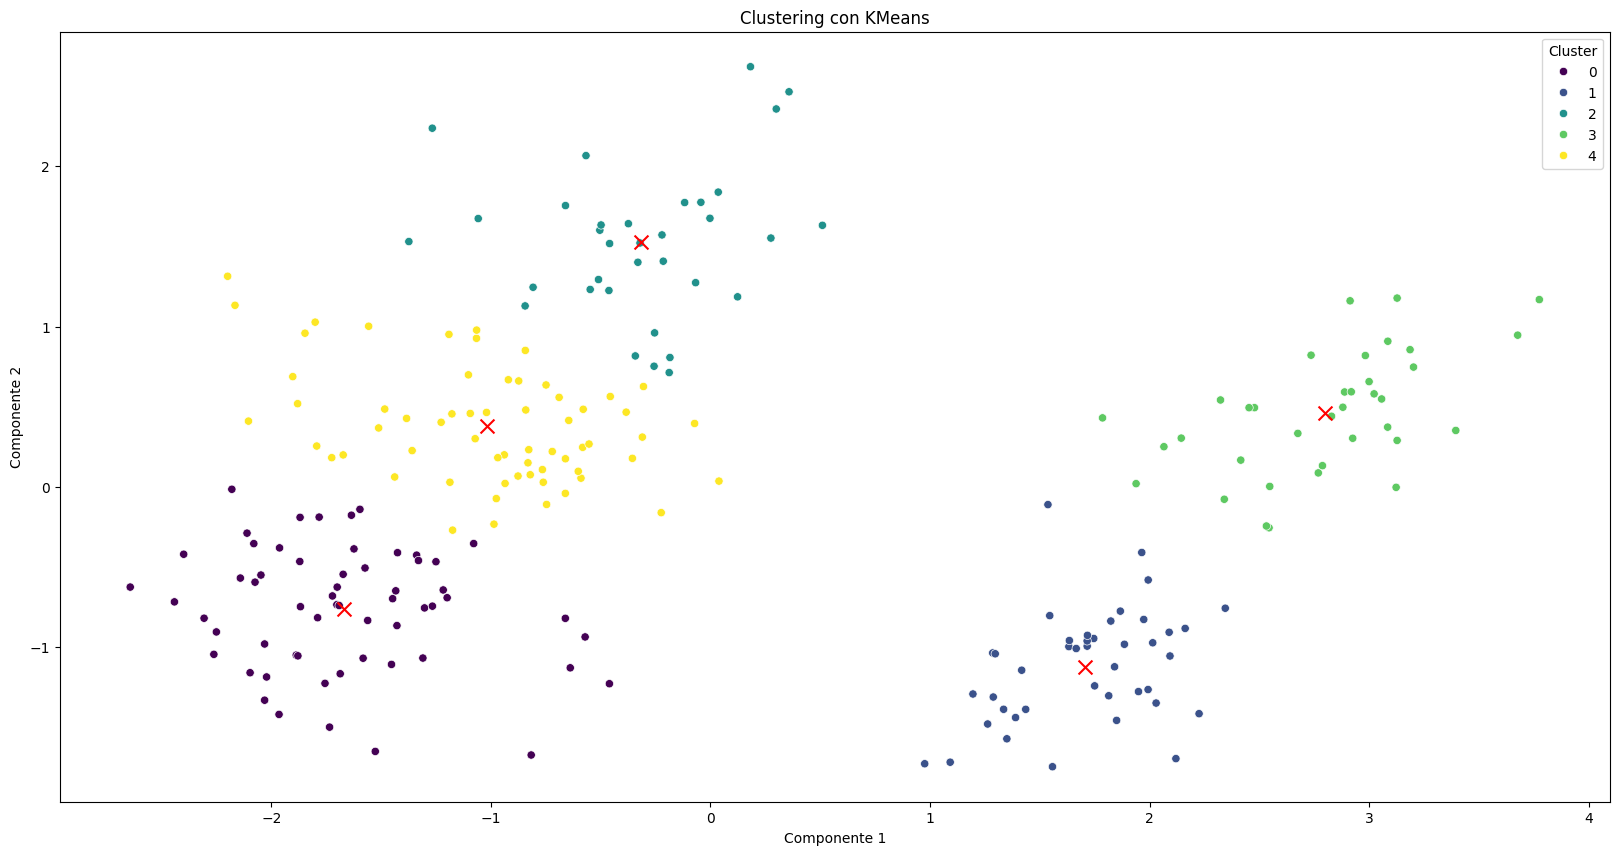

In [36]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_PCA, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')

In [37]:
print(list(zip([0, 1, 2, 3, 4], target_names)))

[(0, 'Adelie'), (1, 'Chinstrap'), (2, 'Gentoo')]


In [38]:
cluster_stats = df_X_PCA.groupby('Cluster')['species'].value_counts(normalize=True)

print(cluster_stats)

Cluster  species
0        0.0        0.627907
         1.0        0.255814
         2.0        0.116279
1        0.0        0.724138
         1.0        0.206897
         2.0        0.068966
2        0.0        0.708333
         1.0        0.250000
         2.0        0.041667
3        0.0        0.555556
         1.0        0.407407
         2.0        0.037037
4        0.0        0.604651
         1.0        0.348837
         2.0        0.046512
Name: proportion, dtype: float64


### Análisis con datos reducidos con TSNE

#### Número óptimo de clusters

In [39]:
cluster_var = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_TSNE)
    cluster_var.append(kmeans.inertia_)

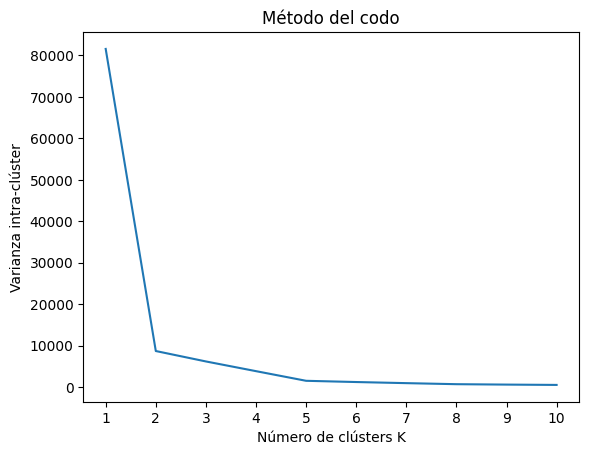

In [40]:
ax = plt.figure().gca()
plt.plot(range(1, 11), cluster_var)
plt.title('Método del codo')
plt.xlabel('Número de clústers K')
plt.ylabel('Varianza intra-clúster')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#### Análisis visual

In [41]:
training_set_copy = training_set.copy()

In [42]:
kmeans = KMeans(n_clusters=5)

kmeans_labels = kmeans.fit_predict(X_TSNE)

df_X_TSNE = pd.DataFrame(X_TSNE, columns=['Componente 1', 'Componente 2'])

df_X_TSNE['species'] = training_set['species']

df_X_TSNE['Cluster'] = kmeans_labels

centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Clustering con KMeans')

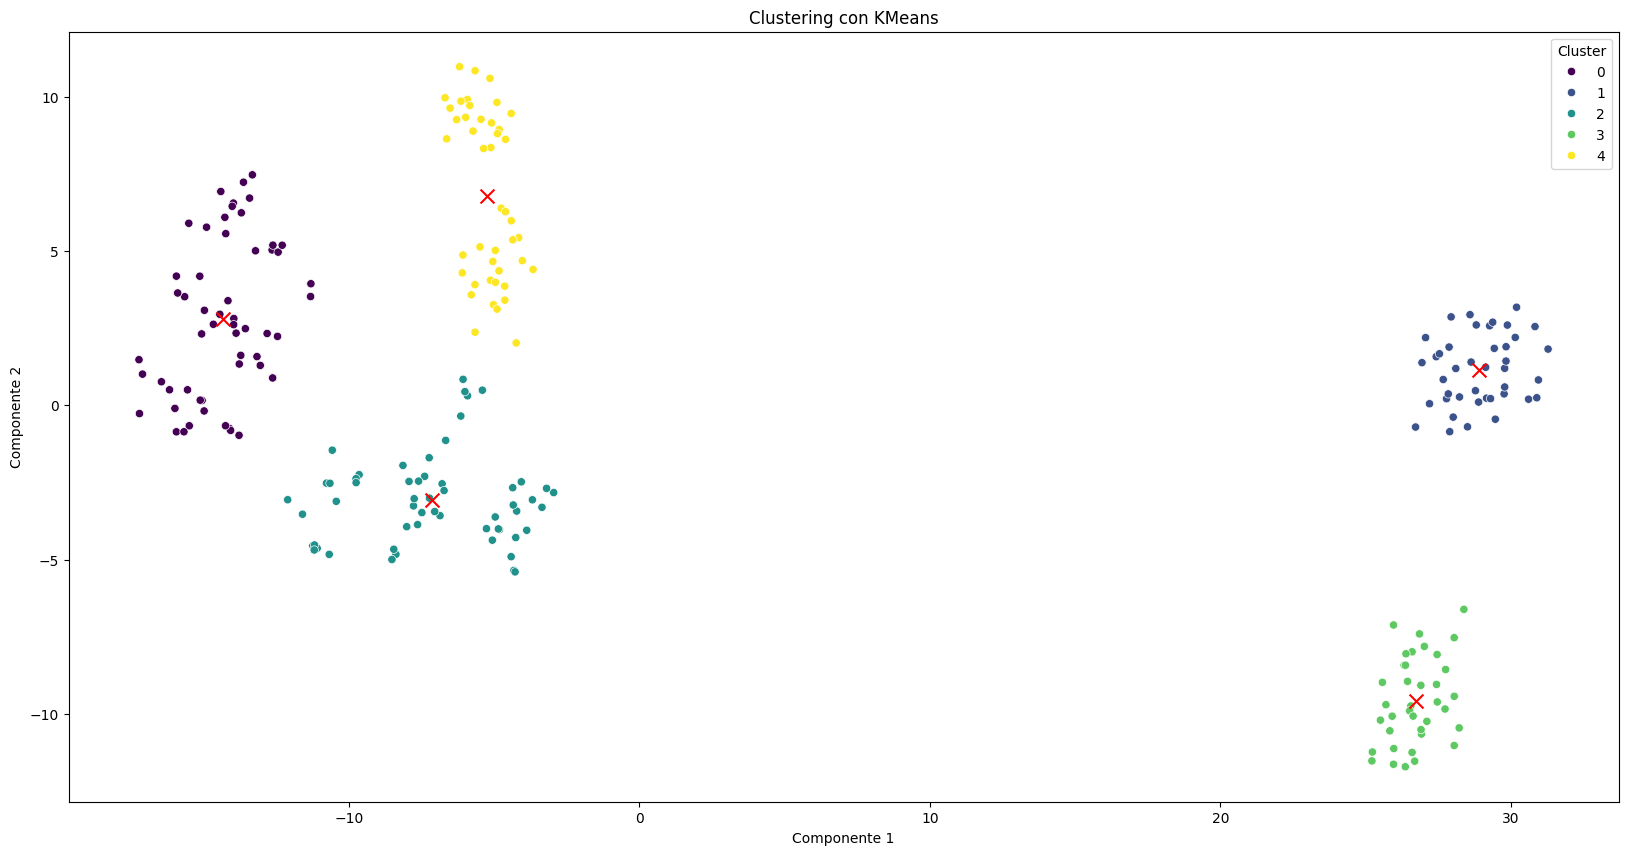

In [43]:
plt.figure(figsize=(20, 10))

sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_X_TSNE, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Clustering con KMeans')

In [44]:
print(list(zip([0, 1, 2, 3, 4], target_names)))

[(0, 'Adelie'), (1, 'Chinstrap'), (2, 'Gentoo')]


In [45]:
cluster_stats = df_X_TSNE.groupby('Cluster')['species'].value_counts(normalize=True)

print(cluster_stats)

Cluster  species
0        0.0        0.650000
         1.0        0.300000
         2.0        0.050000
1        0.0        0.714286
         1.0        0.214286
         2.0        0.071429
2        0.0        0.625000
         1.0        0.250000
         2.0        0.125000
3        0.0        0.571429
         1.0        0.392857
         2.0        0.035714
4        0.0        0.633333
         1.0        0.333333
         2.0        0.033333
Name: proportion, dtype: float64


## Misión 5: Predicción de la especie

### Predicción tradicional

In [46]:
from sklearn import metrics

In [47]:
def training_and_eval(model, training, eval, features, target):
    model.fit(training[features], training[target])
    predictions = model.predict(eval[features])
    balanced_accuracy = metrics.balanced_accuracy_score(eval[target], predictions)
    print(f'Exactitud balanceada: {balanced_accuracy}')

In [48]:
features_columns = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
target = 'species'

Modelo 1: Árbol de decisión

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model_1 = DecisionTreeClassifier()
training_and_eval(model_1, training_set, test_set, features_columns, target)

Exactitud balanceada: 0.9916666666666667


Modelo 2: Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_2 = RandomForestClassifier()
training_and_eval(model_2, training_set, test_set, features_columns, target)

Exactitud balanceada: 1.0


### Predicción jerárquica

In [53]:
hierarchical_df = df.copy()

In [54]:
hierarchical_df_groups = training_set.groupby('species')

In [55]:
for (name, group) in hierarchical_df_groups:
    display(group.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2
151,0,1,-0.414324,0.636739,0.041342,-0.213952,2
129,0,2,0.081424,0.383045,0.726678,-0.213952,2
68,0,2,-1.482088,-0.327298,-0.796290,-1.440851,1


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
219,1,1,1.244525,0.738217,-0.187103,-0.504533,1
202,1,1,0.844114,-0.428775,-0.110954,-1.085696,1
163,1,1,1.530534,1.550037,-0.491697,-0.504533,2
154,1,1,1.454265,0.991911,-0.567845,-0.665967,2
215,1,1,2.312290,1.296343,0.025767,-0.213952,2


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
244,2,0,-0.147382,-2.103155,1.107420,1.077520,1
290,2,0,0.767845,-1.139118,1.183569,0.754652,1
230,2,0,-0.528727,-1.798722,1.031272,0.625505,1
312,2,0,0.348366,-1.392812,0.025767,0.754652,1
342,2,0,0.291164,-1.240596,0.878975,1.335815,1


In [56]:
hierarchical_df_group_1 = hierarchical_df_groups.get_group(0)
hierarchical_df_group_2 = pd.concat([hierarchical_df_groups.get_group(1), hierarchical_df_groups.get_group(2)])

In [57]:
display(hierarchical_df_group_1)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2
151,0,1,-0.414324,0.636739,0.041342,-0.213952,2
129,0,2,0.081424,0.383045,0.726678,-0.213952,2
68,0,2,-1.482088,-0.327298,-0.796290,-1.440851,1
...,...,...,...,...,...,...,...
94,0,1,-1.424887,0.027874,-1.024735,-1.117983,1
72,0,2,-0.776601,-0.022865,-0.339400,-0.795115,1
89,0,1,-0.910071,0.788955,-0.796290,-0.730541,1
114,0,0,-0.776601,1.752992,0.025767,-0.343099,1


In [58]:
display(hierarchical_df_group_2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
219,1,1,1.244525,0.738217,-0.187103,-0.504533,1
202,1,1,0.844114,-0.428775,-0.110954,-1.085696,1
163,1,1,1.530534,1.550037,-0.491697,-0.504533,2
154,1,1,1.454265,0.991911,-0.567845,-0.665967,2
215,1,1,2.312290,1.296343,0.025767,-0.213952,2
...,...,...,...,...,...,...,...
250,2,0,0.691576,-0.986902,1.640459,1.400388,2
221,2,0,1.206391,-0.479514,2.249646,1.981551,2
270,2,0,0.558105,-1.545029,0.726678,0.883799,1
278,2,0,-0.090181,-1.392812,0.574381,0.367210,1


In [59]:
hierarchical_df_group_1['group'] = 1
hierarchical_df_group_2['group'] = 2

C:\Users\Ronaldo Sosa\AppData\Local\Temp\ipykernel_20044\3741482010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hierarchical_df_group_1['group'] = 1


In [60]:
display(hierarchical_df_group_1)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,group
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1,1
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2,1
151,0,1,-0.414324,0.636739,0.041342,-0.213952,2,1
129,0,2,0.081424,0.383045,0.726678,-0.213952,2,1
68,0,2,-1.482088,-0.327298,-0.796290,-1.440851,1,1
...,...,...,...,...,...,...,...,...
94,0,1,-1.424887,0.027874,-1.024735,-1.117983,1,1
72,0,2,-0.776601,-0.022865,-0.339400,-0.795115,1,1
89,0,1,-0.910071,0.788955,-0.796290,-0.730541,1,1
114,0,0,-0.776601,1.752992,0.025767,-0.343099,1,1


In [61]:
display(hierarchical_df_group_2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,group
219,1,1,1.244525,0.738217,-0.187103,-0.504533,1,2
202,1,1,0.844114,-0.428775,-0.110954,-1.085696,1,2
163,1,1,1.530534,1.550037,-0.491697,-0.504533,2,2
154,1,1,1.454265,0.991911,-0.567845,-0.665967,2,2
215,1,1,2.312290,1.296343,0.025767,-0.213952,2,2
...,...,...,...,...,...,...,...,...
250,2,0,0.691576,-0.986902,1.640459,1.400388,2,2
221,2,0,1.206391,-0.479514,2.249646,1.981551,2,2
270,2,0,0.558105,-1.545029,0.726678,0.883799,1,2
278,2,0,-0.090181,-1.392812,0.574381,0.367210,1,2


In [62]:
hierarchical_df = pd.concat([hierarchical_df_group_1, hierarchical_df_group_2])

In [63]:
display(hierarchical_df)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,group
42,0,1,-1.463021,0.636739,0.025767,-1.376277,1,1
59,0,0,-1.157945,0.941172,-0.491697,-0.536820,2,1
151,0,1,-0.414324,0.636739,0.041342,-0.213952,2,1
129,0,2,0.081424,0.383045,0.726678,-0.213952,2,1
68,0,2,-1.482088,-0.327298,-0.796290,-1.440851,1,1
...,...,...,...,...,...,...,...,...
250,2,0,0.691576,-0.986902,1.640459,1.400388,2,2
221,2,0,1.206391,-0.479514,2.249646,1.981551,2,2
270,2,0,0.558105,-1.545029,0.726678,0.883799,1,2
278,2,0,-0.090181,-1.392812,0.574381,0.367210,1,2


In [64]:
hierarchical_training_set, hierarchical_test_set = train_test_split(hierarchical_df.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(hierarchical_training_set)}')
print(f'Tamaño set test: {len(hierarchical_test_set)}')

Tamaño set entrenamiento: 163
Tamaño set test: 70


In [65]:
hierarchical_df_group_2_training_set, hierarchical_df_group_2_test_set = train_test_split(hierarchical_df_group_2.copy(), test_size = 0.3)

print(f'Tamaño set entrenamiento: {len(hierarchical_df_group_2_training_set)}')
print(f'Tamaño set test: {len(hierarchical_df_group_2_test_set)}')

Tamaño set entrenamiento: 88
Tamaño set test: 39


In [66]:
features_columns = ['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

Entreno el primer modelo para que clasifique de acuerdo al grupo al que pertenece.

In [67]:
target = 'group'
model_1 = DecisionTreeClassifier()
model_1.fit(hierarchical_training_set[features_columns], hierarchical_training_set[target])

DecisionTreeClassifier()

Entreno el segundo modelo para que clasifique de acuerdo a las especies del grupo 2

In [68]:
target = 'species'
model_2 = RandomForestClassifier()
model_2.fit(hierarchical_df_group_2_training_set[features_columns], hierarchical_df_group_2_training_set[target])

RandomForestClassifier()

Se realiza la predicción para el set de test

In [69]:
predictions_group = model_1.predict(hierarchical_test_set[features_columns])

In [70]:
balanced_accuracy = metrics.balanced_accuracy_score(hierarchical_test_set['group'], predictions_group)
print(f'Exactitud balanceada: {balanced_accuracy}')

Exactitud balanceada: 0.9583333333333333


In [71]:
print(predictions_group)

[1 1 1 2 2 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 2 1 1 1 2 2
 1 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 1 2 2 2 1 1 2 2 1 1 1 2 1]


In [72]:
print(list(zip([0, 1, 2], target_names)))

[(0, 'Adelie'), (1, 'Chinstrap'), (2, 'Gentoo')]


Ahora si pertenece al grupo 2 se clasifica con el modelo 2, de lo contrario como el grupo 1 tiene una sola especie se clasifica con esta misma.

In [73]:
test_set_group_1 = hierarchical_test_set[predictions_group == 1]
display(test_set_group_1.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,group
76,0,2,-0.528727,-0.225820,-0.720142,-0.601394,1,1
113,0,0,-0.280853,1.144127,0.025767,0.141203,2,1
79,0,2,-0.299920,0.941172,-0.415548,-0.213952,2,1
55,0,0,-0.433391,0.687478,-0.720142,-0.601394,2,1
66,0,0,-1.558357,-0.530253,0.025767,-1.053409,1,1


In [74]:
test_set_group_2 = hierarchical_test_set[predictions_group == 2]

In [75]:
predictions_species = model_2.predict(test_set_group_2[features_columns])

In [76]:
balanced_accuracy = metrics.balanced_accuracy_score(test_set_group_2['species'], predictions_species)
print(f'Exactitud balanceada: {balanced_accuracy}')

Exactitud balanceada: 0.6666666666666666


In [77]:
print(predictions_species)

[2 2 2 2 2 1 2 1 2 1 1 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 1 1 2 2 2 2 1 2 2 2 2
 2 2 2 1]
